## The 'Hello World' of Machine Learning: Digits

In this notebook we will do some elementary analysis and machine learning on the famous 'digits' example using Python and the scikit-learn library. 

scikit-learn has a large built-in dataset of 8x8 images of the digits 0 - 9. Here we analyse this dataset and do some naive Bayes classification on it.

We begin by importing the necessary libraries:

In [2]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

We now load in the digits dataset and extract the two components: the features matrix and target vector. The features matrix stores each image in a table. Each row is an image, and each of the 64 columns is a pixel in the image. The data is therefore 64-dimensional. The target vector stores the labels for each image.

In [3]:
digits = load_digits() #Load the digits dataset
X = digits.data #Features matrix
y = digits.target #Target vector

Before doing any machine learning, we do some simple visualisation to get a feel for the data. First, we simply plot the first 100 images.

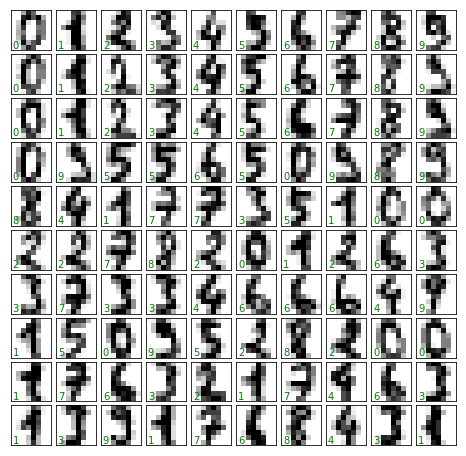

In [4]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

#Visualise the first 100 images in digits:
for i,ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap = 'binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

Next, we perform a dimensional reduction to reduce the data down to two dimensions and thus efficiently visualise it.

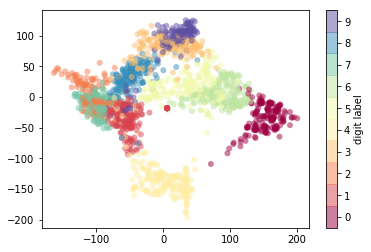

In [5]:
iso = Isomap(n_components=2) #Reduce data to 2d
iso.fit(digits.data)
data_projected = iso.transform(digits.data)

#Visualise the reduced dataset:
plt.figure() #Create new figure
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

We can see that the different digits are fairly well-separated, so we can use a simple algorithm to perform the classification - Naive Gaussian Bayes. We start by splitting the dataset into training and test data, and then create and fit the model. We then use the model to predict the target vector of the test data and compute the accuracy score:

In [6]:
#Use Naive Gaussian Bayes to train and predict labels
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)
result = accuracy_score(ytest, y_model)
print ('Accuracy score: {}'.format(result))

Accuracy score: 0.8333333333333334


We see that this simple routine does well. We can get a better idea of where it fails by computing and visualising the confusion matrix:

Text(91.68,0.5,'True')

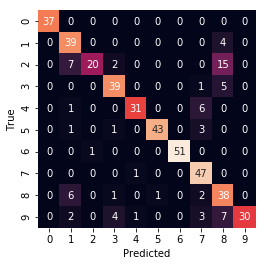

In [7]:
#Calculate confusion matrix for the above fit:
cmat = confusion_matrix(ytest, y_model)
sns.heatmap(cmat, square=True, annot=True, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')